In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set(font_scale = 1.5)

# 1.Read dataset and observe relationships between predictors and response

In [2]:
house = pd.read_csv('kc_house_data.csv')

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
print(house.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [5]:
house = house.drop(['id', 'date', 'sqft_basement', 'zipcode'], axis = 1) #sqft_basement = sqft_living - sqft_above; zipcode can be determined by lat, long

In [6]:
house.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,2003,0,47.3684,-122.031,2390,7570


In [7]:
house = house[house['bedrooms'] != 33]

In [10]:
#sns.pairplot(house)

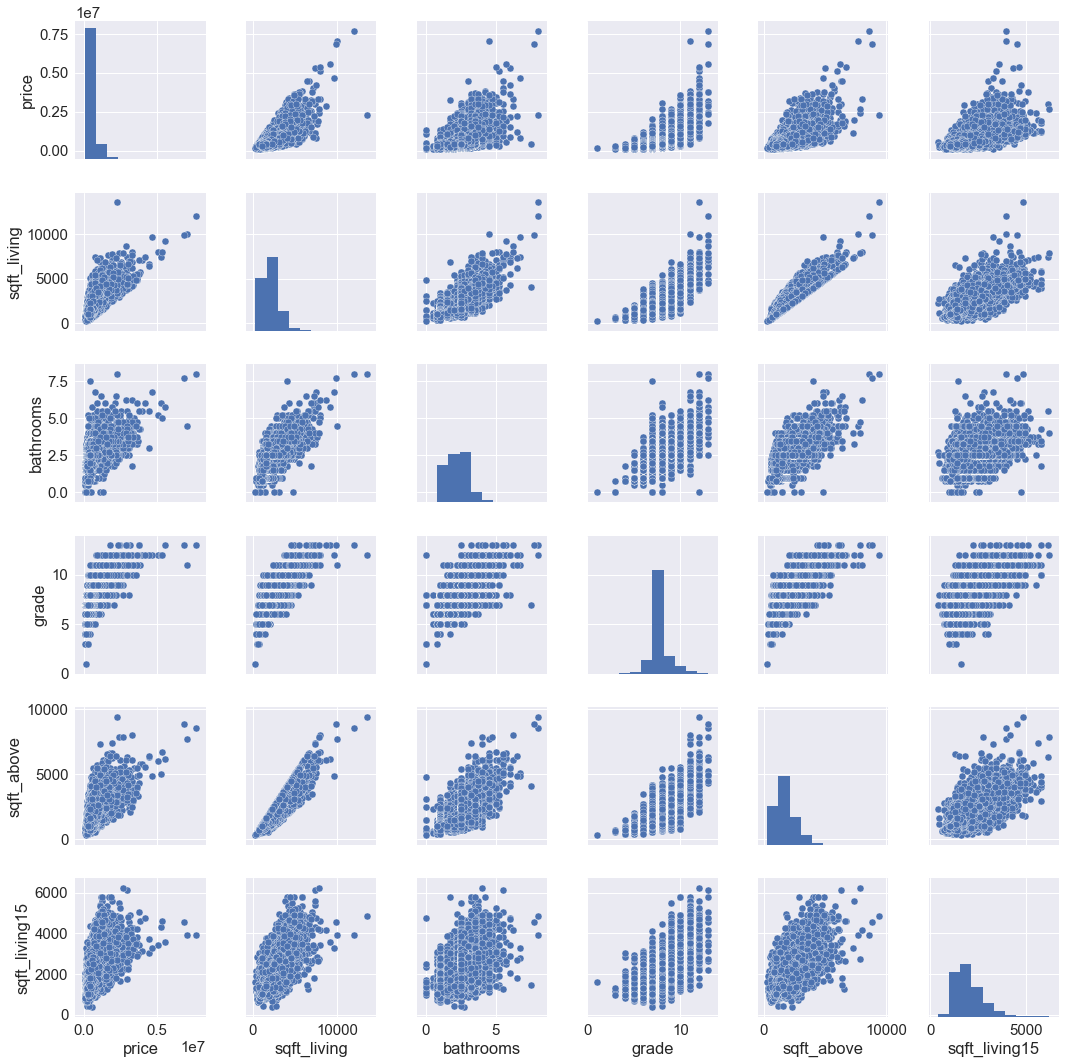

In [14]:
features = ['price', 'sqft_living', 'bathrooms', 'grade', 'sqft_above', 'sqft_living15']
g = sns.pairplot(house[features])

In [9]:
y = house['price']
X = house.drop(['price'], axis = 1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,47.6168,-122.045,1800,7503


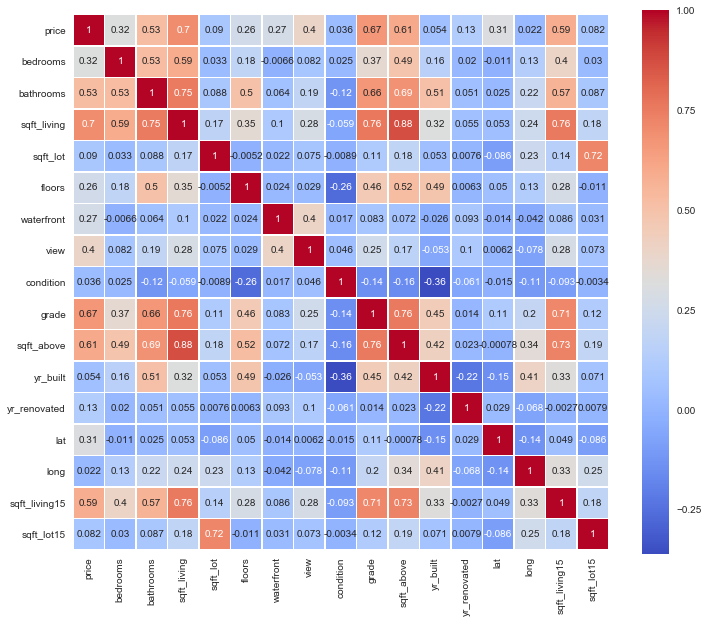

In [10]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(house.corr(), cmap='coolwarm', 
            square=True, linewidths=.5, annot = True)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# 2. Model selection

##  2.1 Simple Linear Regression (Using Sqft_living)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
lm = LinearRegression()

In [165]:
X_train1 = np.array(X_train['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train1 = np.array(y_train, dtype=pd.Series)
X_test1 = np.array(X_train['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test1 = np.array(y_train, dtype=pd.Series)

In [166]:
lm.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(lm.intercept_)

-44316.36663236481


In [34]:
print(lm.coef_)

[281.1043067]


In [35]:
predictions1 = lm.predict(X_test1)

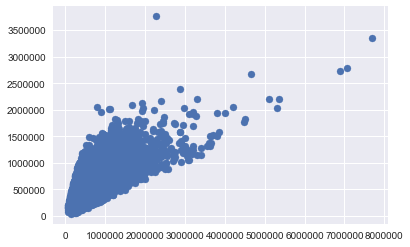

In [36]:
plt.scatter(y_test1,predictions1)

Text(0.5,1,'Truth vs Prediction')

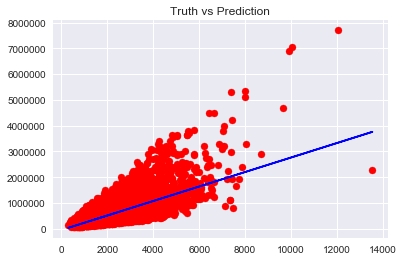

In [37]:
plt.scatter(X_test1, y_test1, color = 'red')
plt.plot(X_test1, predictions1, color = 'blue')
plt.title('Truth vs Prediction')

In [38]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions1)))

RMSE: 263287.7950095675


In [39]:
r2_score(y_test1, predictions1)

0.49298677980611194

## 2.2 Multiple Regression( With all variables)

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(lm.intercept_)

-36792205.81647222


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-37733.949671
bathrooms,43093.936357
sqft_living,149.178462
sqft_lot,0.150527
floors,847.114157
waterfront,604705.521927
view,51699.091641
condition,31145.636713
grade,95856.574518
sqft_above,35.176884


In [19]:
predictions = lm.predict(X_test)

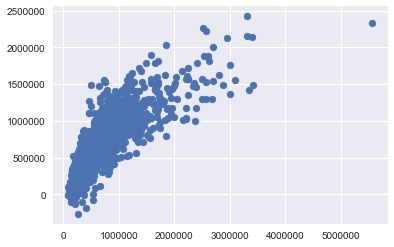

In [20]:
plt.scatter(y_test,predictions)

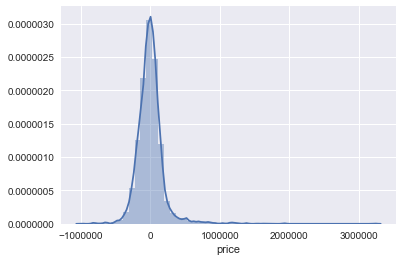

In [21]:
sns.distplot((y_test-predictions),bins=50)

In [22]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 198742.31455790135


In [23]:
r2_score(y_test, predictions)

0.6889794496682062

## 2.3 Multiple Regression( With all variables but transform y to log(y))

In [14]:
import math

In [15]:
y_train3 = y_train.apply(math.log)
y_test3 = y_test.apply(math.log)

In [28]:
lm.fit(X_train, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-9.070156e-03
bathrooms,7.092125e-02
sqft_living,1.436177e-04
sqft_lot,4.881247e-07
floors,6.914215e-02
waterfront,3.838180e-01
view,5.687707e-02
condition,6.940793e-02
grade,1.602975e-01
sqft_above,-9.814299e-06


In [30]:
predictions3 = lm.predict(X_test)

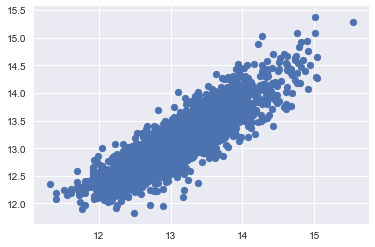

In [31]:
plt.scatter(y_test3,predictions3)

In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, predictions3)))

RMSE: 0.25314366141478883


In [33]:
r2_score(y_test3, predictions3)

0.7657425827887819

# Use features selected by Lasso regression

## Linear regression(log^y)

In [16]:
features2 = ['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'sqft_living15', 'yr_built','yr_renovated']

In [17]:
lm.fit(X_train[features2], y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
coeff_df = pd.DataFrame(lm.coef_,X_train[features2].columns,columns=['Coefficient'])
coeff_df

,Coefficient
bathrooms,0.068581
sqft_living,0.000134
floors,0.066005
waterfront,0.384165
view,0.060422
condition,0.068320
grade,0.162483
lat,1.360108
sqft_living15,0.000097
yr_built,-0.003327


Text(0,0.5,'Predicted value')

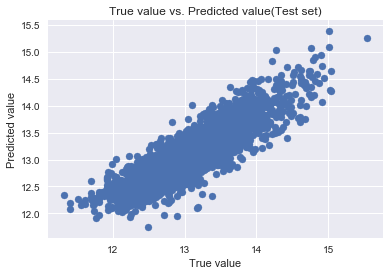

In [26]:
predictions5 = lm.predict(X_test[features2])
plt.scatter(y_test3, predictions5)
plt.title('True value vs. Predicted value(Test set)')
plt.xlabel('True value')
plt.ylabel('Predicted value')

In [38]:
r2_score(y_test3, predictions5)

0.764320141274899

In [39]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, predictions5)))

RMSE: 0.25391105886643844


## Polynomial regression(log^y, degree = 2 and degree = 3)

In [40]:
poly = PolynomialFeatures(degree=2)
Xtrain_poly2 = poly.fit_transform(X_train[features2])
Xtest_poly2 = poly.fit_transform(X_test[features2])
#poly.fit(Xtrain_poly2, y_train3)
lin2 = LinearRegression() 
lin2.fit(Xtrain_poly2, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predpoly2 = lin2.predict(Xtest_poly2)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, predpoly2)))

RMSE: 0.2348403588763355


In [42]:
r2_score(y_test3, predpoly2)

0.7983934179932239

In [43]:
poly = PolynomialFeatures(degree=3)
Xtrain_poly3 = poly.fit_transform(X_train[features2])
Xtest_poly3 = poly.fit_transform(X_test[features2])
#poly.fit(Xtrain_poly3, y_train3)
lin2 = LinearRegression() 
lin2.fit(Xtrain_poly3, y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
predpoly3 = lin2.predict(Xtest_poly3)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test3, predpoly3)))

RMSE: 0.23295258162510107


In [45]:
r2_score(y_test3, predpoly3)

0.8016216418885356

## Assumption test for (log^y ~ features2, polynomial(degree =2))

In [46]:
residuals1 = y_test3 - predpoly3

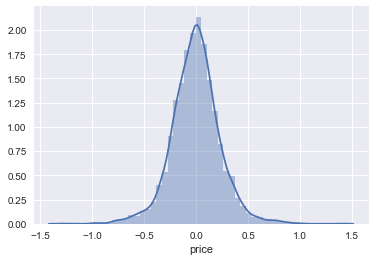

In [47]:
sns.distplot(residuals1)

Text(0,0.5,'residuals')

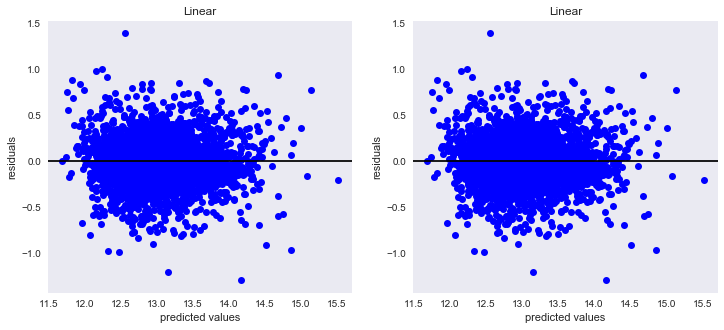

In [48]:
fig, axes = plt.subplots(1,2,sharex = False, sharey = False)
fig.set_size_inches(12,5)
axes[0].plot(predpoly2, residuals1, 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(predpoly2, residuals1, 'bo')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Linear')
axes[1].set_xlabel('predicted values')
axes[1].set_ylabel('residuals')

In [51]:
#stats.probplot(residuals1, dist="norm", plot=pylab)
#pylab.show()